In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression


In [3]:
#Load data
data = pd.read_csv('rent_clean.csv')
test = data[['price_per_sqm', 'apartment', 'house', 'number_of_whole_rooms', 'floor', 'number_of_half_rooms', 'furnish_furnished', 'furnish_partly_furnished', 'view_garden', 'view_panoramic', 'view_street', 'balcony', 'lift', 'air_conditioner', 'utility_double_comfort', 'heating_gas', 'heating_wall_heating', 'heating_combination', 'heating_ceiling', 'heating_central_heating', 'heating_electric', 'heating_floor', 'heating_circulating', 'heating_district', 'available_immediately', 'condition_of_property_renovated', 'parking']]
test = test.dropna()



/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (39,50,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
X = test[['apartment', 'house', 'number_of_whole_rooms', 'floor', 'number_of_half_rooms', 'furnish_furnished', 'furnish_partly_furnished', 'view_garden', 'view_panoramic', 'view_street', 'balcony', 'lift', 'air_conditioner', 'utility_double_comfort', 'heating_gas', 'heating_wall_heating', 'heating_combination', 'heating_ceiling', 'heating_central_heating', 'heating_electric', 'heating_floor', 'heating_circulating', 'heating_district', 'available_immediately', 'condition_of_property_renovated', 'parking']]
y = test[['price_per_sqm']]


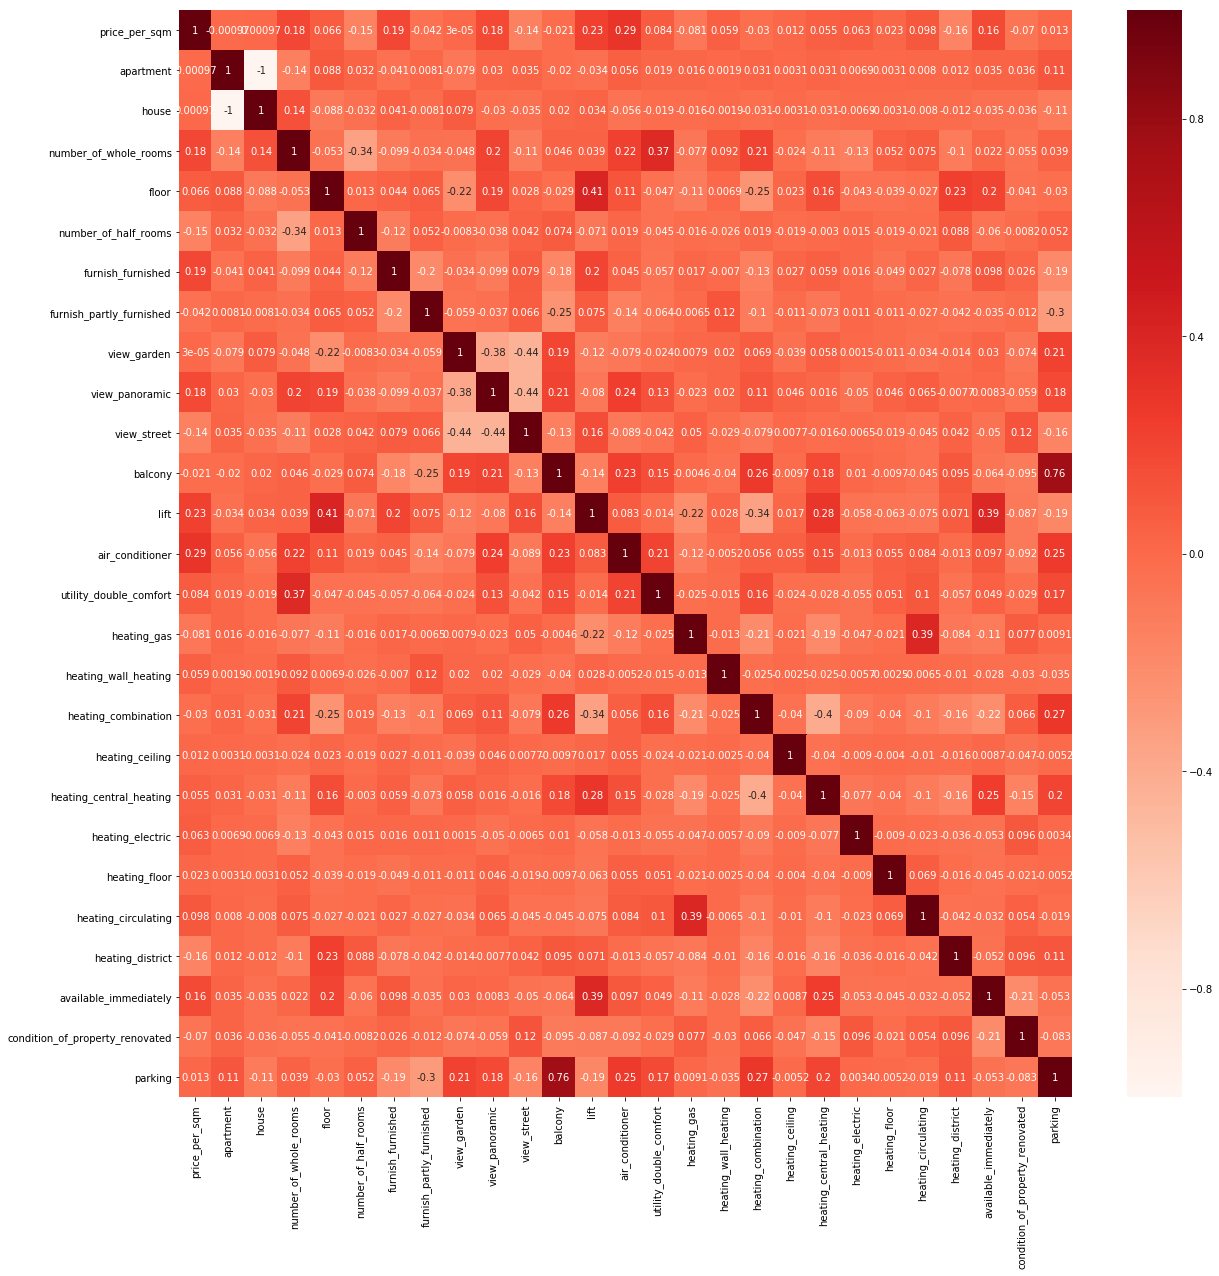

In [5]:
#Correlation heatmap
#Pearson correlation
plt.figure(figsize = (20, 20))
cor = test.corr()
hm = sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()
figure = hm.get_figure()    
figure.savefig('cor_hm.png')


In [6]:
#Correlation with output variable
cor_target = abs(cor['price_per_sqm'])

#Select highly correlated features
relevant_features = cor_target[cor_target > 0.1]
print(relevant_features)


price_per_sqm            1.000000
number_of_whole_rooms    0.181159
number_of_half_rooms     0.150775
furnish_furnished        0.186163
view_panoramic           0.176179
view_street              0.143694
lift                     0.225967
air_conditioner          0.290727
heating_district         0.157370
available_immediately    0.164613
Name: price_per_sqm, dtype: float64


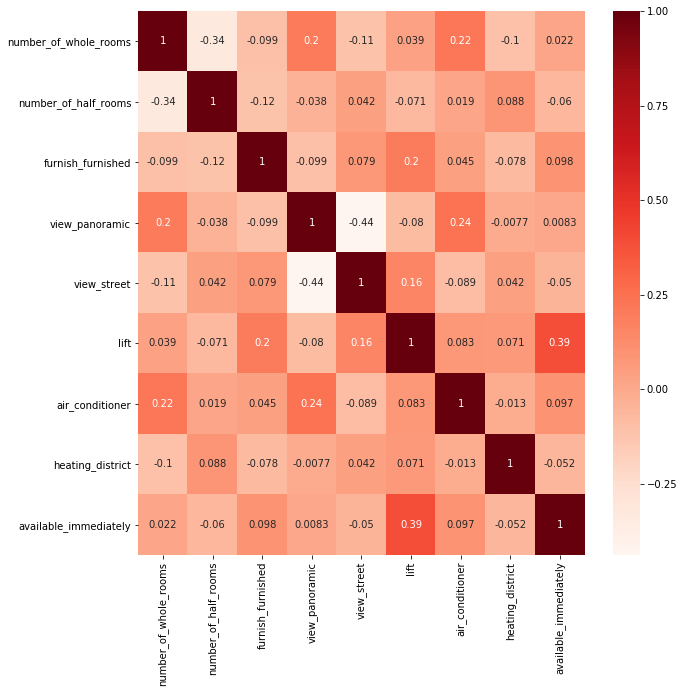

In [7]:
#The independent variables need to be uncorrelated with each other
plt.figure(figsize = (10, 10))
test_1 = test[['number_of_whole_rooms','number_of_half_rooms','furnish_furnished','view_panoramic','view_street','lift','air_conditioner', 'heating_district', 'available_immediately'  ]]
cor = test_1.corr()
hm_1 = sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()
figure = hm_1.get_figure()    
figure.savefig('var_cor_hm.png')


In [10]:
#'view_panoramic','view_street'
#'lift', 'available_immediately'  
# Are highly correlated, according to the importance calculated by random forest, we drop
#'view_street','available_immediately'
